## Decision Tree Classifier & Random Forest Classifier 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

In [2]:
%matplotlib inline
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


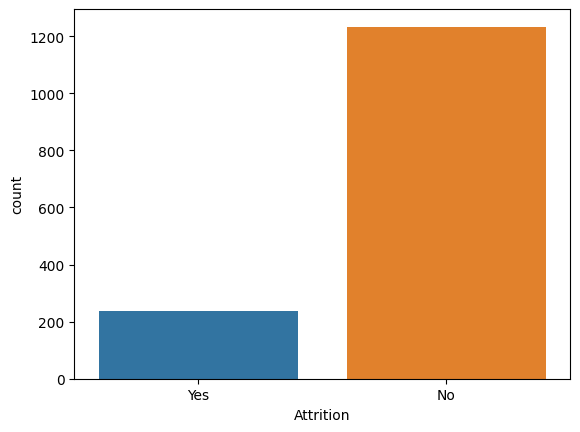

In [5]:
# Exploratory Data Analysis

sns.countplot(x='Attrition', data=df)
from pandas.core.arrays import categorical
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column) 

df['Attrition'] = df['Attrition'].astype("category").cat.codes 

for column in categorical_col:
    df[column] = LabelEncoder().fit_transform(df[column])

In [6]:
X = df.drop('Attrition', axis=1)
y = df['Attrition'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):

    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n=======================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(" ")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(" ")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n")
    elif not train:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

        print("Test Result:\n=======================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(" ")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(" ")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n")

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pickle import TRUE
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
 
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
 
Confusion Matrix: 
[[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
 
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
 
Confusion Matrix: 
[[323  57]
 [ 41  20]]



In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
 
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
 
Confusion Matrix: 
[[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.17%
 
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.871795   0.500000  0.861678    0.685897      0.820367
recall       0.984211   0.098361  0.861678    0.541286      0.861678
f1-score     0.924598   0.164384  0.861678    0.544491      0.819444
support    380.000000  61.000000  0.861678  441.000000    441.000000
 
Confusion Matrix: 
[[374   6]
 [ 55   6]]

